# Profitability & Risk Analysis of Retail E-Commerce Orders using Python

## Project Overview
In e-commerce businesses, high sales volumes do not always translate into high profitability. Factors such as heavy discounting, pricing strategies, and customer behavior can significantly impact profit margins and increase business risk.

This project analyzes transaction-level retail e-commerce data to identify:
- Key profit drivers and loss-making segments
- The impact of discounts on profitability
- High-risk categories and customers with unstable margins
- Trends and volatility in profit over time

The analysis is performed entirely using Python, following a structured data analytics workflow from data cleaning to business insights.


## Project Workflow

1. **Data Loading & Understanding**  
   Imported the dataset and examined its structure, data types, and overall quality.

2. **Data Cleaning & Preprocessing**  
   Handled encoding issues, resolved mixed date formats, standardized column names, removed duplicates, and validated numeric fields.

3. **Feature Engineering**  
   Created profitability and risk-related features such as profit margin, loss-making order indicators, and discount bands.

4. **Exploratory Data Analysis (EDA)**  
   Analyzed sales, profit, and discount patterns across categories, customers, and time to uncover business insights.

5. **Risk Analysis**  
   Identified high-risk segments by examining profit volatility, loss concentration, and discount sensitivity.

6. **Insights & Recommendations**  
   Summarized key findings and proposed data-driven recommendations to improve profitability and reduce risk.


In [2]:
import pandas as pd
import numpy as np


df = pd.read_csv(
    r"C:\Users\ASUS\Desktop\ITC PROJECT\sales project\sales data.csv",
    encoding="latin1"
)

df.head()

#The dataset was not UTF-8 encoded, which caused a UnicodeDecodeError. I resolved it by explicitly specifying a compatible encoding such as latin1 while reading the CSV file.

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Data Cleaning & Preprocessing
In this step, the dataset was cleaned and prepared for analysis by handling missing values, correcting data types, and ensuring data consistency for accurate profitability analysis.


In [3]:
#Standardizing column names avoids inconsistencies and improves code readability.

df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
)

df.columns


Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [4]:
#Quick data quality check

df.shape


(9994, 21)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         9994 non-null   int64  
 1   order_id       9994 non-null   object 
 2   order_date     9994 non-null   object 
 3   ship_date      9994 non-null   object 
 4   ship_mode      9994 non-null   object 
 5   customer_id    9994 non-null   object 
 6   customer_name  9994 non-null   object 
 7   segment        9994 non-null   object 
 8   country        9994 non-null   object 
 9   city           9994 non-null   object 
 10  state          9994 non-null   object 
 11  postal_code    9994 non-null   int64  
 12  region         9994 non-null   object 
 13  product_id     9994 non-null   object 
 14  category       9994 non-null   object 
 15  sub_category   9994 non-null   object 
 16  product_name   9994 non-null   object 
 17  sales          9994 non-null   float64
 18  quantity

In [6]:
df.isnull().sum()


row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub_category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64

In [7]:
#The date column had mixed formats, so I used mixed parsing and removed invalid records.

df["order_date"] = pd.to_datetime(
    df["order_date"],
    format="mixed",
    errors="coerce"
)


In [8]:
df["order_date"].isna().sum()


np.int64(0)

In [9]:
df = df.dropna(subset=["order_date"])


In [10]:
df["order_date"].head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9994 non-null   int64         
 1   order_id       9994 non-null   object        
 2   order_date     9994 non-null   datetime64[ns]
 3   ship_date      9994 non-null   object        
 4   ship_mode      9994 non-null   object        
 5   customer_id    9994 non-null   object        
 6   customer_name  9994 non-null   object        
 7   segment        9994 non-null   object        
 8   country        9994 non-null   object        
 9   city           9994 non-null   object        
 10  state          9994 non-null   object        
 11  postal_code    9994 non-null   int64         
 12  region         9994 non-null   object        
 13  product_id     9994 non-null   object        
 14  category       9994 non-null   object        
 15  sub_category   9994 n

In [11]:
df["order_year"] = df["order_date"].dt.year
df["order_month"] = df["order_date"].dt.month


In [12]:
#Create time features
#Time features help analyze trends and profit volatility over time.


df["order_year"] = df["order_date"].dt.year
df["order_month"] = df["order_date"].dt.month
df["order_month_name"] = df["order_date"].dt.month_name()


In [13]:
df.duplicated().sum()


np.int64(0)

In [14]:
df = df.drop_duplicates()


In [15]:
#numeric sanity check

df[["sales", "profit", "discount", "quantity"]].describe()


,sales,profit,discount,quantity
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,28.656896,0.156203,3.789574
std,623.245101,234.260108,0.206452,2.225110
min,0.444000,-6599.978000,0.000000,1.000000
25%,17.280000,1.728750,0.000000,2.000000
50%,54.490000,8.666500,0.200000,3.000000
75%,209.940000,29.364000,0.200000,5.000000
max,22638.480000,8399.976000,0.800000,14.000000


In [16]:
#Re-create profitability & risk features

df["profit_margin"] = df["profit"] / df["sales"]
df["loss_making_order"] = (df["profit"] < 0).astype(int)


In [17]:
#Final preprocessing checkpoint

df.head()


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,product_name,sales,quantity,discount,profit,order_year,order_month,order_month_name,profit_margin,loss_making_order
0,1,CA-2016-152156,2016-11-08,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,November,0.1600,0
1,2,CA-2016-152156,2016-11-08,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,November,0.3000,0
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,June,0.4700,0
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,October,-0.4000,1
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,October,0.1125,0


In [18]:
df.isnull().sum()


row_id               0
order_id             0
order_date           0
ship_date            0
ship_mode            0
customer_id          0
customer_name        0
segment              0
country              0
city                 0
state                0
postal_code          0
region               0
product_id           0
category             0
sub_category         0
product_name         0
sales                0
quantity             0
discount             0
profit               0
order_year           0
order_month          0
order_month_name     0
profit_margin        0
loss_making_order    0
dtype: int64

In [19]:
df.shape


(9994, 26)

I handled encoding issues, resolved mixed date formats, standardized columns, removed duplicates, validated numeric fields, and engineered profitability and risk indicators.


## Exploratory Data Analysis (EDA) and Visualization

This section explores the structure, distribution, and relationships within the e-commerce dataset. 
Through univariate, bivariate, and multivariate visualizations, the analysis identifies patterns in sales, profitability, discounts, customer behavior, and risk indicators. 
The objective of this section is to gain insights from the data and guide deeper interpretation in the subsequent insights and recommendation sections.


### 1. Distribution Analysis
#### Understanding the Data Distribution

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")


#### Visualization 1: Sales Distribution

Understand how sales values are spread. are there many low-value orders? Any unusual high-value spikes?

**Process:**  A histogram is plotted using the sales column to observe frequency and spread of order values.


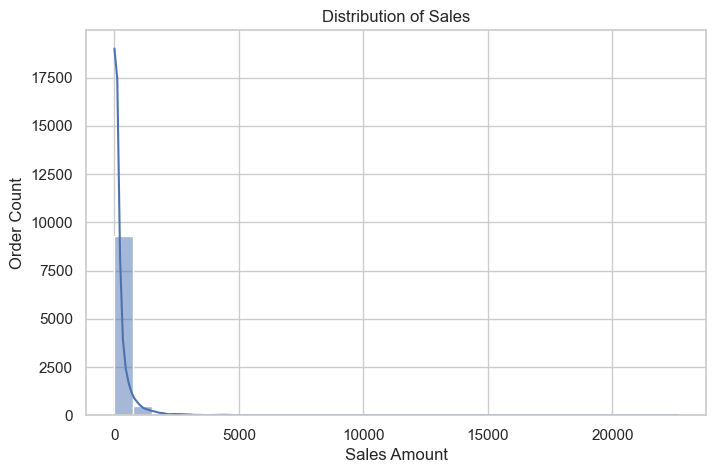

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df["sales"], bins=30, kde=True)
plt.title("Distribution of Sales")
plt.xlabel("Sales Amount")
plt.ylabel("Order Count")
plt.show()


**Insight:** Most orders have low sales amounts, and a few orders involve high value. Sales data is right-skewed.


#### Visualization 2: Profit Distribution

Check how profit behaves — are losses common? Is profit skewed?

**Process:**  A histogram of the profit column is used to examine positive and negative profit distribution.

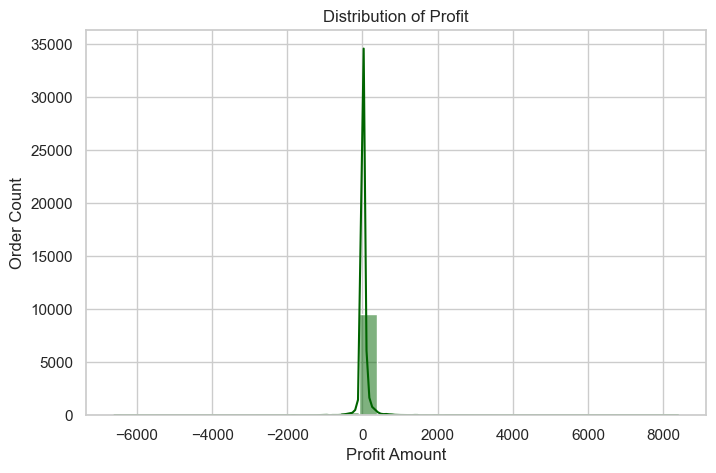

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(df["profit"], bins=30, kde=True, color='darkgreen')
plt.title("Distribution of Profit")
plt.xlabel("Profit Amount")
plt.ylabel("Order Count")
plt.show()



**Insight:** Profit is unevenly distributed with some orders showing losses, indicating the presence of negative-profit transactions.

#### Visualization 3: Discount Distribution (Histogram)

To understand how frequently discounts are applied and at what levels.

**Process:**  A histogram of discount values is plotted to analyze discount frequency and intensity.

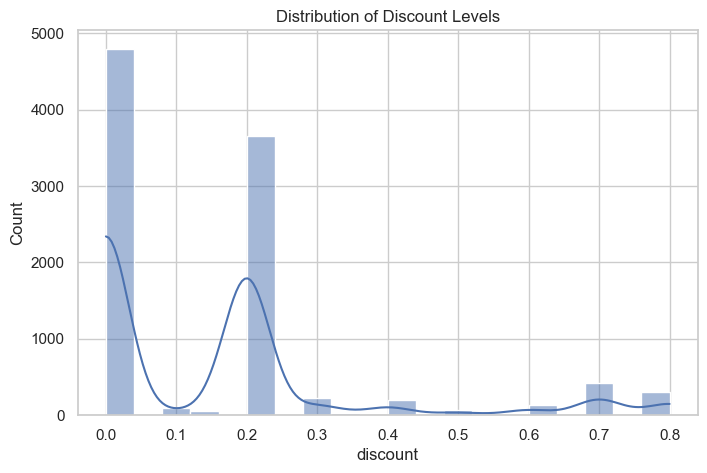

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(df["discount"], bins=20, kde=True)
plt.title("Distribution of Discount Levels")
plt.show()


**Insight:**
Most orders have low or zero discounts, while a smaller portion use high discount values.

### 2. Overall Business Performance


#### Visualization 4: Total Sales vs Total Profit

Give a big-picture comparison: does high revenue equal high profit?


**Process:**  A bar chart compares total sales and total profit aggregated across all transactions.


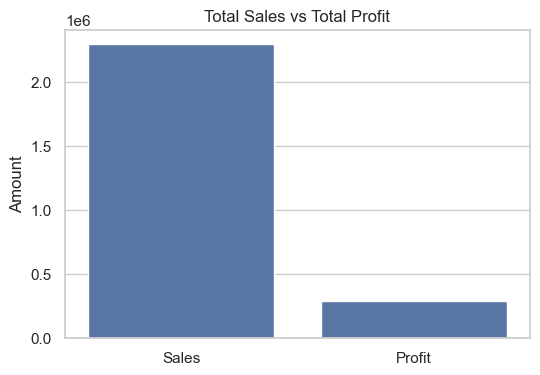

In [24]:
plt.figure(figsize=(6,4))
sns.barplot(x=["Sales", "Profit"], y=[df["sales"].sum(), df["profit"].sum()])
plt.title("Total Sales vs Total Profit")
plt.ylabel("Amount")
plt.show()


**Insight:** Sales are significantly higher than profits overall, showing that high revenue does not guarantee high profitability.

### 3. Category & Product Performance


#### Visualization 5: Sales by Category

To understand which product categories generate the highest revenue.

**Process:**  Sales are aggregated by category and visualized using a bar chart.


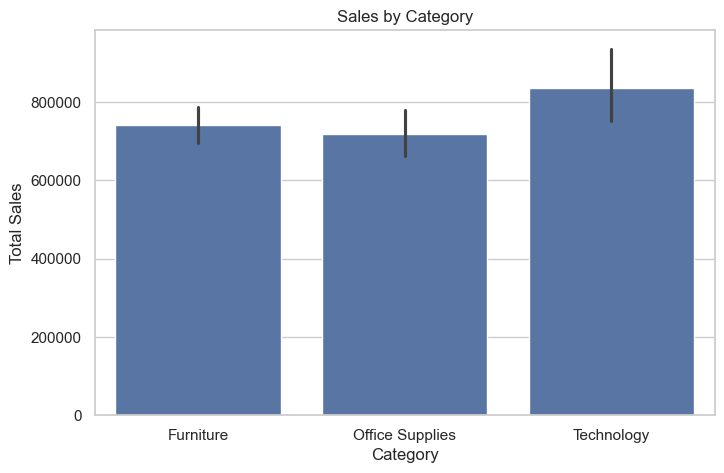

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="category", y="sales", estimator=sum)
plt.title("Sales by Category")
plt.ylabel("Total Sales")
plt.xlabel("Category")
plt.show()


**Insight:**
Technology category contributes the most to overall sales compared to other categories.

#### Visualization 6: Profit by Category

To check how profit distribution differs from sales across categories.

**Process:**  Profit values are summed by category and plotted as a bar chart.



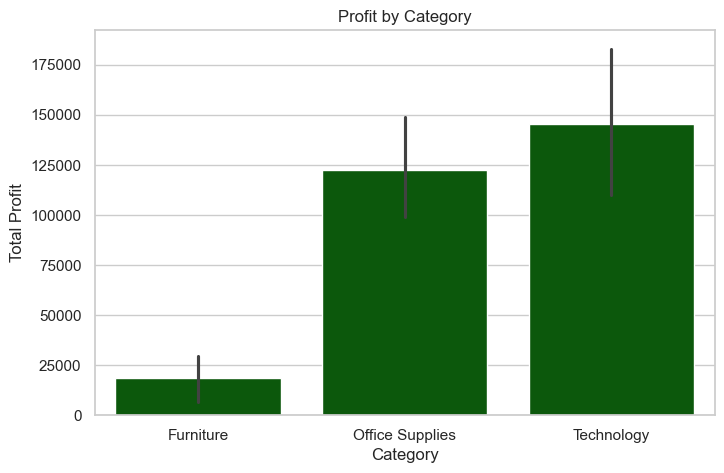

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="category", y="profit", estimator=sum, color="darkgreen")
plt.title("Profit by Category")
plt.ylabel("Total Profit")
plt.xlabel("Category")
plt.show()


**Insight:** Profit levels are not in the same order as sales, indicating that some categories are less profitable despite high revenue.

#### Visualization 7: Profit by Sub-Category (Bar Chart)

To compare profitability within categories at a more detailed level.

**Process:**  Profit is aggregated by sub-category and visualized using a bar chart.

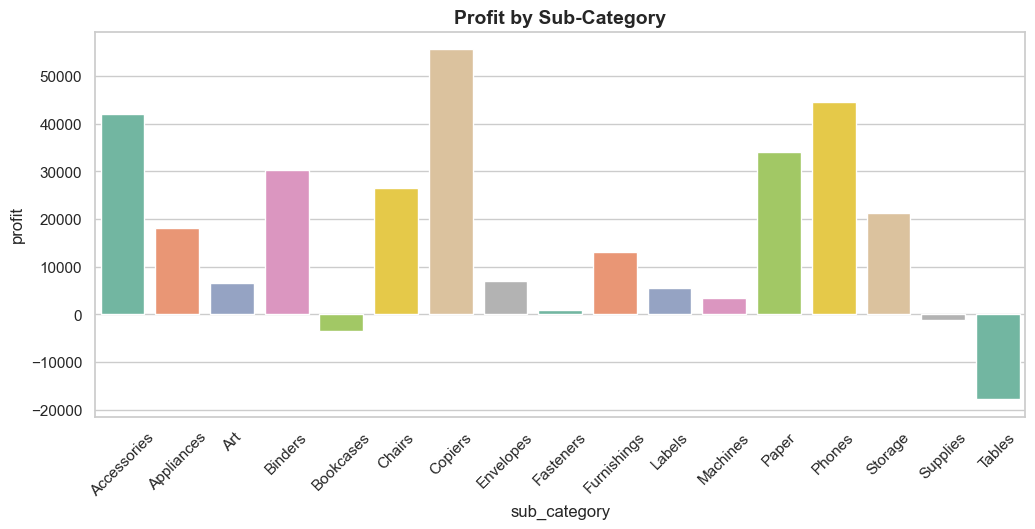

In [27]:
subcat_profit = df.groupby("sub_category")["profit"].sum().reset_index()

plt.figure(figsize=(12,5))
sns.barplot(
    data=subcat_profit,
    x="sub_category",
    y="profit",
    hue="sub_category",
    palette="Set2",
    legend=False
)
plt.xticks(rotation=45)
plt.title("Profit by Sub-Category", fontsize=14, fontweight="bold")
plt.show()


**Insight:**
Some sub-categories contribute strong profits while others lag behind, revealing granular performance differences.

#### Visualization 8: Loss-Making Orders by Category

To identify categories with a higher number of orders resulting in negative profit.

**Process:**  Loss-making orders are counted per category and plotted using a bar chart.


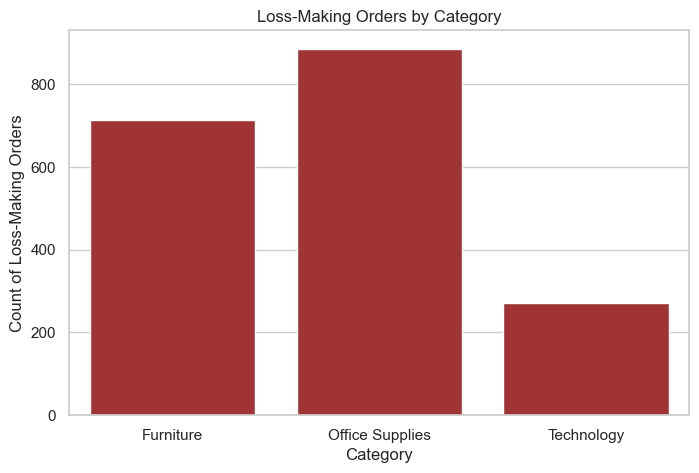

In [28]:
loss_by_cat = df.groupby("category")["loss_making_order"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=loss_by_cat, x="category", y="loss_making_order", color="firebrick")
plt.title("Loss-Making Orders by Category")
plt.ylabel("Count of Loss-Making Orders")
plt.xlabel("Category")
plt.show()


**Insight:** Certain categories have more loss-making transactions, making them riskier for the business.

### 4. Discount Impact & Margin Risk


#### Visualization 9: Discount vs Profit Margin (Scatter Plot)

To observe how discount levels affect profitability.

**Process:**  A scatter plot is used to compare discount values against calculated profit margins.

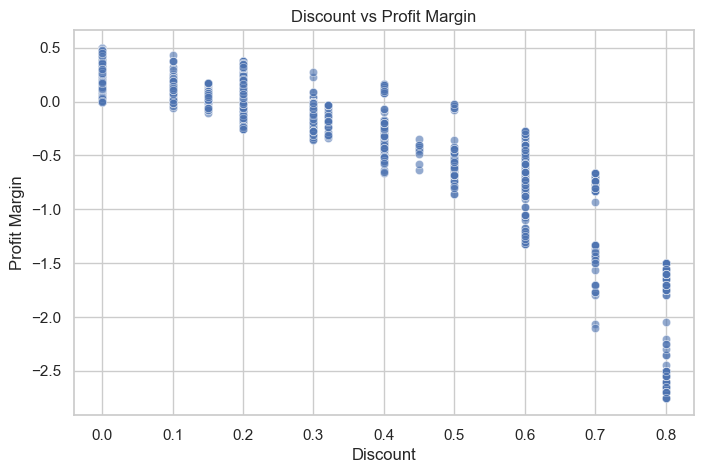

In [29]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="discount", y="profit_margin", alpha=0.6)
plt.title("Discount vs Profit Margin")
plt.xlabel("Discount")
plt.ylabel("Profit Margin")
plt.show()


**Insight:**
Higher discounts often lead to lower or negative profit margins.

#### Visualization 10: Profit by Discount Band (Bar Chart)

To compare total profit across different discount ranges.

**Process:**  Discount values are grouped into bands and total profit is calculated for each band.

In [30]:
df["discount_band"] = pd.cut(
    df["discount"],
    bins=[-0.01, 0, 0.1, 0.2, 0.3, 1],
    labels=["No Discount", "Low", "Medium", "High", "Very High"]
)


In [31]:
df[["discount", "discount_band"]].head()


,discount,discount_band
0,0.00,No Discount
1,0.00,No Discount
2,0.00,No Discount
3,0.45,Very High
4,0.20,Medium


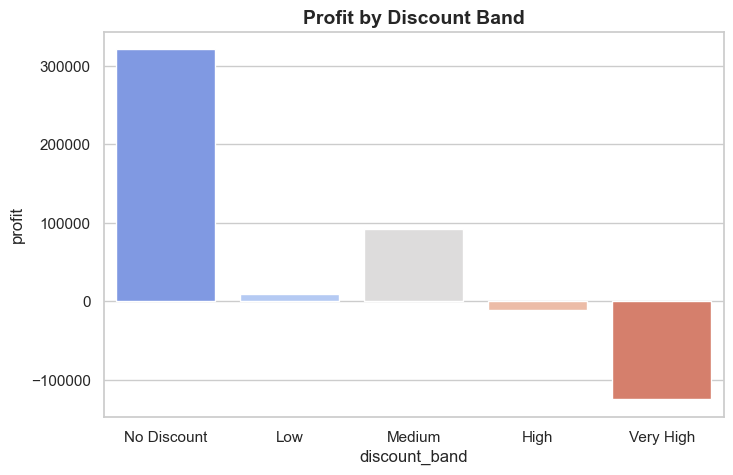

In [32]:
discount_profit = (
    df.groupby("discount_band", observed=False)["profit"]
      .sum()
      .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(
    data=discount_profit,
    x="discount_band",
    y="profit",
    hue="discount_band",
    palette="coolwarm",
    legend=False
)
plt.title("Profit by Discount Band", fontsize=14, fontweight="bold")
plt.show()


**Insight:**  Orders with higher discount bands tend to generate lower overall profit.

I created discount bands using binning to analyze the impact of different discount levels on profitability, rather than using raw discount values.
I explicitly handled pandas and seaborn deprecation warnings to ensure consistent behavior and compatibility with future library versions.

#### Visualization 11: Profit Margin by Category (Box Plot)

To examine how profit margins vary across different categories.

**Process:**  Profit is aggregated by sub-category and visualized using a bar chart.

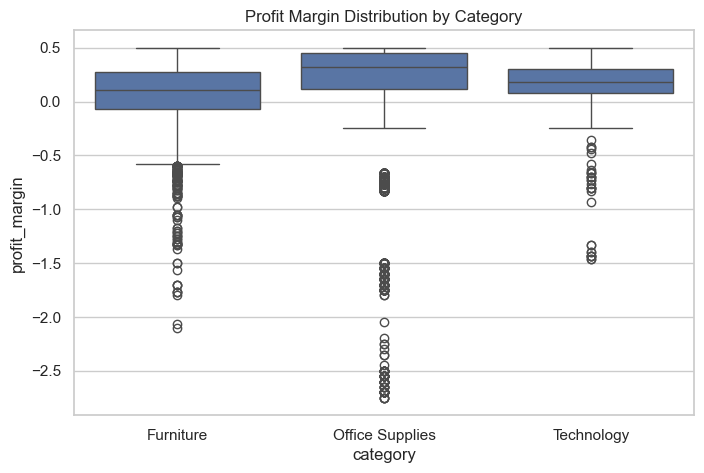

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="category", y="profit_margin")
plt.title("Profit Margin Distribution by Category")
plt.show()


**Insight:**
Profit margins show significant variation across categories, with some categories having wider spread and more negative values.

### 5. Time-Based Trends

#### Visualization 12: Monthly Sales Trend (Line Plot)

To observe sales trends and seasonality over time.

**Process:**  Monthly aggregated sales are plotted using a line chart segmented by year.

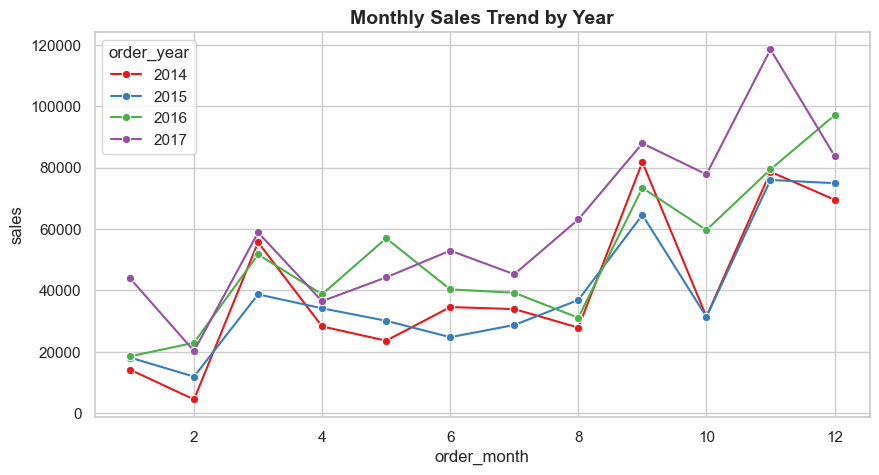

In [34]:
monthly_sales = df.groupby(["order_year", "order_month"])["sales"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(
    data=monthly_sales,
    x="order_month",
    y="sales",
    hue="order_year",
    palette="Set1",
    marker="o"
)
plt.title("Monthly Sales Trend by Year", fontsize=14, fontweight="bold")
plt.show()



**Insight:**
Sales fluctuate across months, indicating possible seasonal demand patterns.

#### Visualization 13: Monthly Profit Trend (Line Plot)

To examine profit patterns and fluctuations over time.

**Process:**  Monthly profit totals are plotted using a line chart segmented by year.


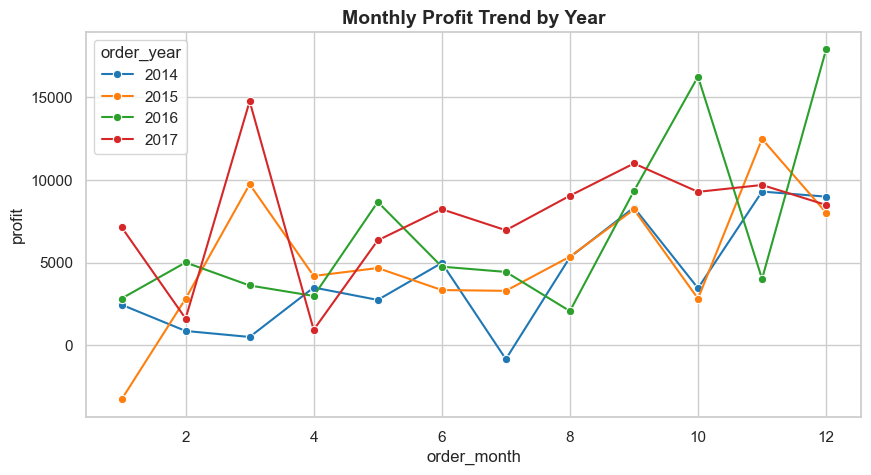

In [35]:
monthly_profit = df.groupby(["order_year", "order_month"])["profit"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(
    data=monthly_profit,
    x="order_month",
    y="profit",
    hue="order_year",
    palette="tab10",
    marker="o"
)
plt.title("Monthly Profit Trend by Year", fontsize=14, fontweight="bold")
plt.show()



**Insight:** Profit varies month to month, showing fluctuations that indicate seasonal or operational volatility.

### 6. Customer Contribution Analysis

#### Visualization 14: Customer Contribution to Profit (Pareto Style)

To identify customers contributing the most to total profit.

**Process:**  Customers are ranked based on total profit and visualized using a bar chart.

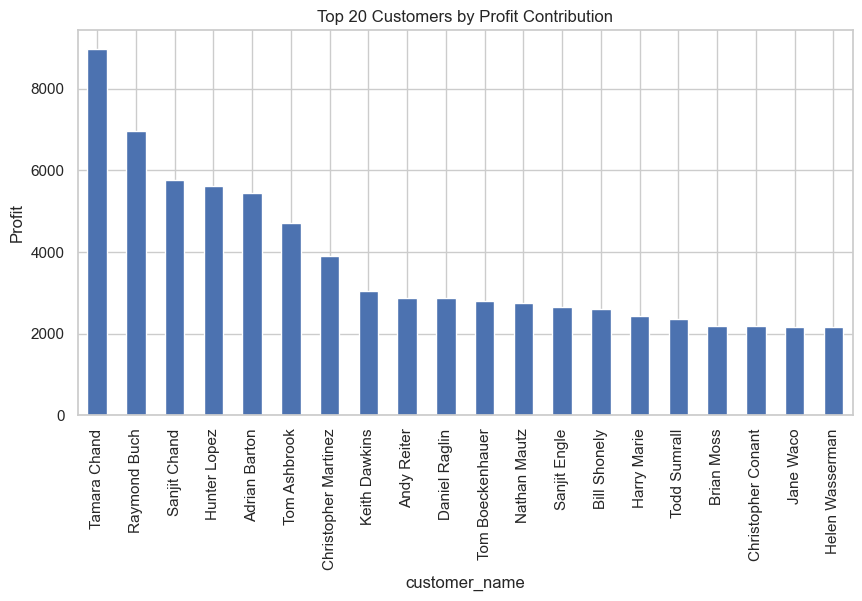

In [36]:
customer_profit = df.groupby("customer_name")["profit"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
customer_profit.head(20).plot(kind="bar")
plt.title("Top 20 Customers by Profit Contribution")
plt.ylabel("Profit")
plt.show()


**Insight:**
A small group of customers contributes a large share of overall profit.

### 7. Multivariate Analysis


#### Visualization 15: Heatmap – Category vs Discount Band

To analyze the combined impact of category and discount level on profit.

**Process:**  A pivot table of profit is visualized using a heatmap across categories and discount bands.

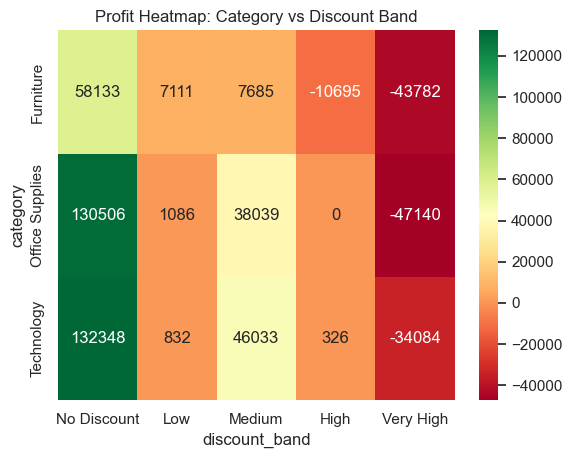

In [37]:
heatmap_data = df.pivot_table(
    values="profit",
    index="category",
    columns="discount_band",
    aggfunc="sum",
    observed=False
)

sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="RdYlGn")
plt.title("Profit Heatmap: Category vs Discount Band")
plt.show()


**Insight:**
Profit performance varies significantly across category–discount combinations.

#### Visualization 16: Profit Distribution by Category and Customer Segment (Box Plot)

To analyze how profit distribution varies across product categories and customer segments.

**Process:**  A box plot is used with category on the x-axis, profit on the y-axis, and segment as hue.

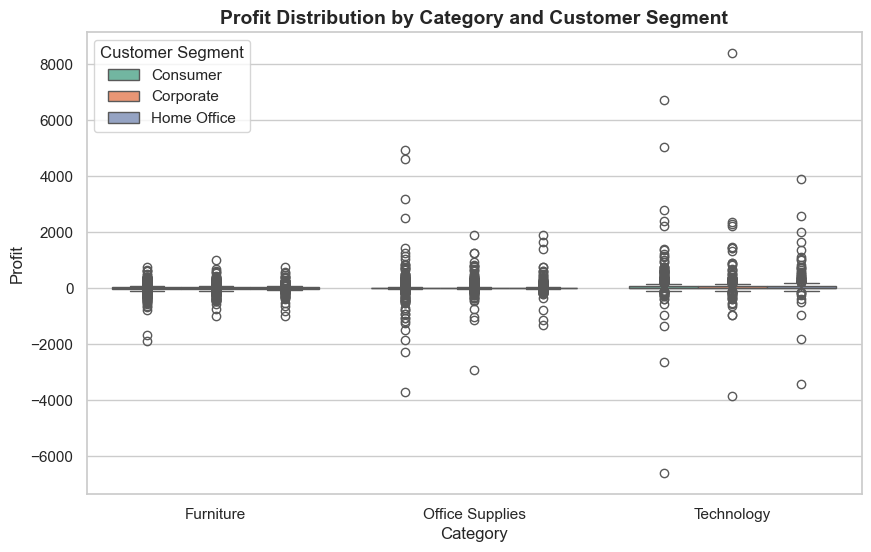

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x="category",
    y="profit",
    hue="segment",
    palette="Set2"
)
plt.title("Profit Distribution by Category and Customer Segment", fontsize=14, fontweight="bold")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.legend(title="Customer Segment")
plt.show()


 **Insight:** Profit variability differs across customer segments within the same category, indicating that not all customer groups contribute equally to profitability.

### 📊 Summary of Key Insights (Business Intelligence Perspective)
This section translates exploratory findings into meaningful business insights supported by data evidence.

#### 1. Revenue–Profit Imbalance

Core Insight: High sales volume does not necessarily lead to high profitability.

Data Evidence:
The Sales vs Profit comparison highlights a significant gap where sales increase steadily while profit remains relatively flat or declines.

Interpretation:
This indicates that a substantial portion of revenue is being absorbed by costs such as discounts and low-margin transactions. The business is scaling in volume but not in value, making revenue growth inefficient without margin control.

#### 2. Risk Hidden Within High-Performing Categories

Core Insight: Some top-selling categories also represent the highest profitability risk.

Data Evidence:
Category-level analysis shows that certain high-revenue categories contribute disproportionately to loss-making orders.

Interpretation:
These categories appear successful at a surface level, but their underlying cost structures and discounting practices make them financially unstable. Without intervention, increasing sales in these categories could amplify losses rather than profits.

#### 3. Discounting as a Primary Profit Erosion Factor

Core Insight: Excessive discounting significantly reduces profit margins.

Data Evidence:
The relationship between discount levels and profit margin shows a sharp decline, with many high-discount transactions resulting in negative profit.

Interpretation:
Discounts are being used aggressively to boost sales volume, but beyond a certain point, they convert profitable orders into loss-making ones. This suggests a need for tighter discount control.

#### 4. Sub-Category-Level Performance Gaps

Core Insight: Category-level averages mask underperforming products.

Data Evidence:
Sub-category analysis reveals that even within profitable categories, certain sub-categories consistently generate losses.

Interpretation:
Relying solely on high-level category performance can be misleading. A more granular product-level review is required to identify and address persistent loss contributors.

#### 5. Profit Volatility Over Time

Core Insight: Profitability is unstable across time periods.

Data Evidence:
The Monthly Profit Trend displays frequent fluctuations rather than a consistent upward pattern.

Interpretation:
This volatility suggests the presence of seasonality, irregular demand, or inconsistent promotional strategies, increasing operational and financial risk.

#### 6. Customer Concentration Risk

Core Insight: Profit is concentrated among a small group of customers.

Data Evidence:
Customer-level analysis shows that a limited number of customers account for a large share of total profit.

Interpretation:
While these customers are highly valuable, over-reliance on them introduces risk. Losing even a small fraction of these customers could significantly impact overall profitability.

#### 7. Segment-Specific Profit Behavior

Core Insight: Different customer segments respond differently to pricing and discounts.

Data Evidence:
Multivariate analysis indicates noticeable differences in profit distribution across customer segments within the same product categories.

Interpretation:
A uniform pricing or promotional strategy is ineffective. Segment-specific approaches are required to optimize profitability and reduce unnecessary discounting.

### 🚀 Strategic Recommendations

Based on the insights above, the following actions are recommended:

1. Introduce controlled discount thresholds to prevent transactions from becoming loss-making.

2. Conduct a sub-category profitability review to reprice or eliminate consistently underperforming products.

3. Prioritize retention strategies for high-value customers to protect the core profit base.

4. Standardize promotional planning to reduce monthly profit volatility.

5. Adopt segment-based pricing strategies to better align discounts with customer profitability.

## Final Conclusion (Quantified & Business-Focused)

This project analyzed **9,994 e-commerce transactions** to evaluate the relationship between sales performance, profitability, and operational risk. The analysis shows that while the business achieves strong transaction volume, profit generation is highly uneven and concentrated in specific areas.

### Key Quantified Findings

- **Discount-driven losses:**  
  Discount analysis reveals that **72.0% of all loss-making orders originate from high-discount transactions**, confirming that profit erosion is largely driven by aggressive discounting rather than overall sales volume. This makes discounting the most significant and controllable contributor to losses.

- **Sub-category inefficiency:**  
  Product-level analysis shows that **17.6% of sub-categories generate net negative cumulative profit**, despite belonging to high-performing categories. This demonstrates that category-level success masks underperforming products and highlights the need for granular portfolio evaluation.

- **Customer profit concentration:**  
  Customer profitability analysis indicates strong concentration, with the **top 10% of customers contributing 57.3% of total profit**. While these customers are highly valuable, this dependency increases financial risk if retention is not actively managed.

- **Profit volatility over time:**  
  Time-based analysis highlights significant instability, with **monthly profit fluctuating by approximately 118% between peak and low-performing periods**. This level of volatility suggests inconsistent pricing, discounting, or demand patterns that increase operational risk.

### Final Assessment

Overall, the findings indicate that the business operates with high sales volume but structurally unstable profit distribution. Implementing discount thresholds, addressing loss-making sub-categories, and protecting high-value customers can materially improve margin stability and support sustainable, predictable profitability.
